# Stealing the Lindhard Variance

The Lindhard papers (NAC I, II, III) have predictions for the variance in charge production. These are done in the reduced variable $\epsilon$ so, I data-theived this function. 

In [1]:
#get the f function from the paper
import dataPython as dp
import numpy as np
import scipy.interpolate as inter
data = dp.getXYdata('data/lind1_var_reformat.txt')
data_0 = dp.getXYdata('data/lind2_var_reformat.txt')

#convert to numpy arrays
e = np.asarray(data['xx'])
Omega2_nu2 = np.asarray(data['yy'])

#smoothing
e = e[e.argsort()]
Omega2_nu2 = Omega2_nu2[e.argsort()]
idx = np.arange(0,np.shape(e)[0])
f_Omega2_nu2 = inter.InterpolatedUnivariateSpline(e[idx%30==0], Omega2_nu2[idx%30==0], k=3)


epr = np.asarray(data_0['xx'])
Omega2_eta2 = np.asarray(data_0['yy'])

#smoothing
epr = epr[epr.argsort()]
Omega2_eta2 = Omega2_eta2[epr.argsort()]
idx = np.arange(0,np.shape(epr)[0])
f_Omega2_eta2 = inter.InterpolatedUnivariateSpline(epr[idx%30==0], Omega2_eta2[idx%30==0], k=3)

In [2]:
#set up a plot 
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

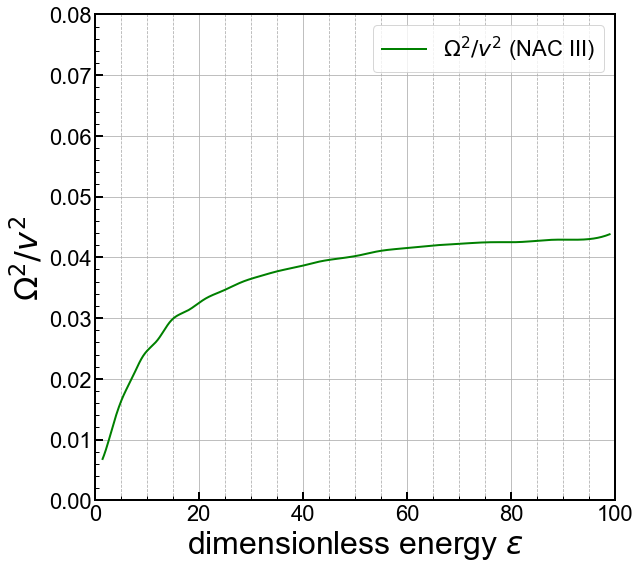

In [3]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=100




#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
ax1.plot (e, f_Omega2_nu2(e), 'g-', label='$\Omega^2/v^2$ (NAC III)')
#ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, xmax)
ax1.set_ylim(0,0.08)
ax1.set_xlabel('dimensionless energy $\epsilon$',**axis_font)
ax1.set_ylabel('$\Omega^2/v^2$',**axis_font)
ax1.grid(True)
ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NACIII_Omega2_nu2.png')
plt.show()

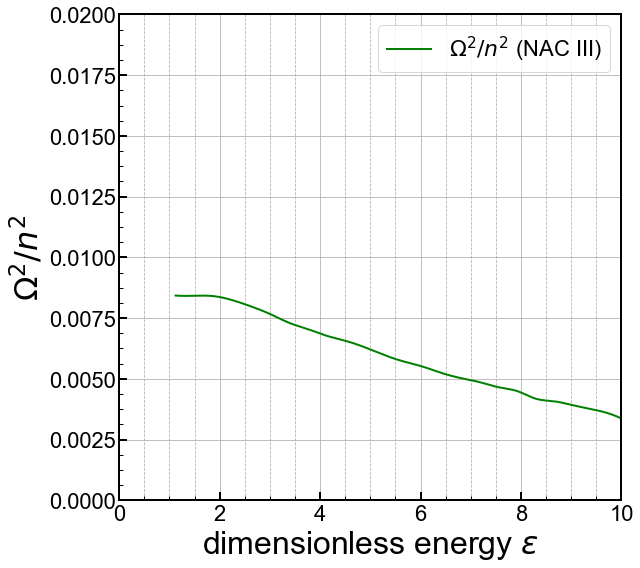

In [4]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10




#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
ax1.plot (epr, f_Omega2_eta2(epr), 'g-', label='$\Omega^2/n^2$ (NAC III)')
#ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, xmax)
ax1.set_ylim(0,0.02)
ax1.set_xlabel('dimensionless energy $\epsilon$',**axis_font)
ax1.set_ylabel('$\Omega^2/n^2$',**axis_font)
ax1.grid(True)
ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NACIII_Omega2_eta2.png')
plt.show()

In [5]:
#convert to energy units for Si (match to Dogherty)
#see N-MISC-18-003 pg 46
#Esi = np.vectorize(lambda x: np.sqrt(2)*2*x/(6.87758e-5*1000))
Esi = np.vectorize(lambda x: 2*x/(6.87758e-5*1000)) #MISTAKE; without factor of sqrt(2)

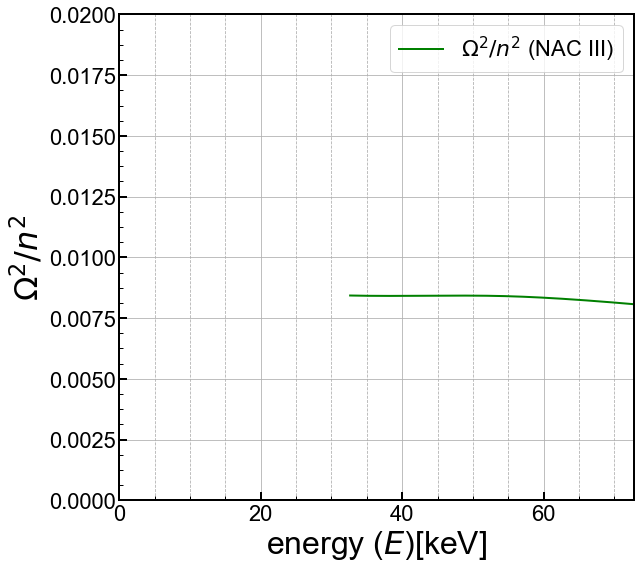

In [6]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=2.5




#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
ax1.plot (Esi(epr), f_Omega2_eta2(epr), 'g-', label='$\Omega^2/n^2$ (NAC III)')
#ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, Esi(xmax))
ax1.set_ylim(0,0.02)
ax1.set_xlabel('energy ($E$)[keV]',**axis_font)
ax1.set_ylabel('$\Omega^2/n^2$',**axis_font)
ax1.grid(True)
ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NACIII_Omega2_eta2_keV.png')
plt.show()

In [7]:
#create a yield model
import lindhard as lind

#lindhard
lpar = lind.getLindhardPars('Si',True) #use the "calculated" value of k
ylind = lind.getLindhard(lpar)
ylindv = np.vectorize(ylind) #careful, this expects inputs in eV

In [8]:
print(ylind(10000))

0.3024946062881219


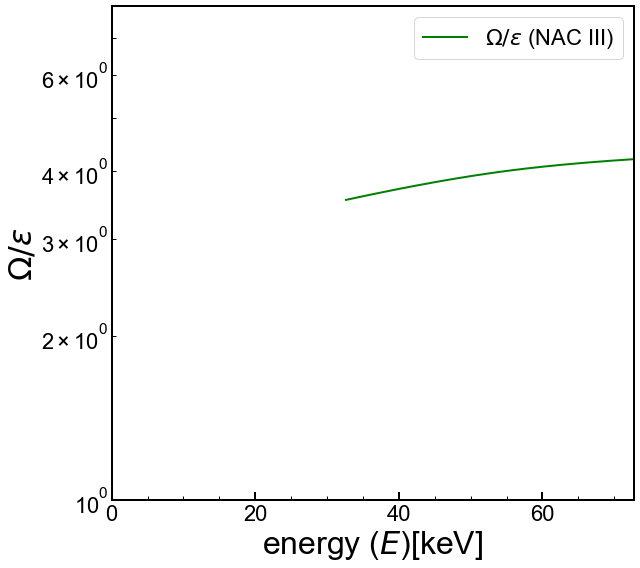

In [9]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=2.5




#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III)')
#ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('log')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, Esi(xmax))
ax1.set_ylim(1,8)
ax1.set_xlabel('energy ($E$)[keV]',**axis_font)
ax1.set_ylabel('$\Omega/\epsilon$',**axis_font)
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NACIII_DoghertyFig2_RMSratio_keV.png')
plt.show()